In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import pyplot
from numpy import asarray
import tensorflow as tf
import cv2
import keras
import warnings
warnings.filterwarnings('ignore')

C:\Users\win10\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:458: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\win10\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:459: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\win10\anaconda3\envs\deep_learning\lib\site-packages\tensorflow\python\framework\dtypes.py:460: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\win10\anaconda3\envs\deep_learning\lib\s

In [4]:
# To test the avilability of GPU!
print(tf.test.is_gpu_available())

False


In [5]:
print(tf.__version__)

1.3.0


In [6]:
keras.__version__

'2.1.3'

In [7]:
from keras.models import load_model
model = load_model('Model/facenet_keras.h5')

In [8]:
model.inputs

[<tf.Tensor 'input_1:0' shape=(?, 160, 160, 3) dtype=float32>]

In [9]:
model.outputs

[<tf.Tensor 'Bottleneck_BatchNorm/cond/Merge:0' shape=(?, 128) dtype=float32>]

In [10]:
# model.summary()

### Face Detection using MTCNN

In [11]:
import mtcnn

In [66]:
image1 = cv2.imread('images/Santosh/santosh1.jpg')
# image2 = cv2.imread('images/santosh2.jpg')
# image3 = cv2.imread('images/santosh3.jpg')
# image4 = cv2.imread('images/santosh4.jpeg')
# image5 = cv2.imread('images/santosh image.JPG')

In [67]:
from mtcnn.mtcnn import MTCNN
from PIL import Image
mtcnn = MTCNN()

In [68]:
image1new = cv2.cvtColor(image1,cv2.COLOR_BGR2RGB)
cv2.namedWindow("Display", cv2.WINDOW_NORMAL)   
cv2.imshow('Display',image1new)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [69]:
# using asarray!
img_arr = asarray(image1new)
img_arr.shape

(2048, 2048, 3)

In [70]:
# using np.array!
img_arr = np.array(image1new)
img_arr.shape

(2048, 2048, 3)

In [71]:
box_result = mtcnn.detect_faces(img_arr)

In [72]:
box_result

[{'box': [688, 207, 328, 413],
  'confidence': 0.999997615814209,
  'keypoints': {'left_eye': (778, 383),
   'right_eye': (922, 361),
   'nose': (858, 451),
   'mouth_left': (798, 521),
   'mouth_right': (944, 502)}},
 {'box': [288, 1068, 82, 99],
  'confidence': 0.9967926144599915,
  'keypoints': {'left_eye': (321, 1109),
   'right_eye': (356, 1103),
   'nose': (347, 1128),
   'mouth_left': (330, 1149),
   'mouth_right': (359, 1143)}},
 {'box': [1086, 497, 48, 77],
  'confidence': 0.9748528599739075,
  'keypoints': {'left_eye': (1113, 522),
   'right_eye': (1131, 518),
   'nose': (1128, 539),
   'mouth_left': (1113, 556),
   'mouth_right': (1124, 554)}},
 {'box': [329, 1748, 86, 111],
  'confidence': 0.902112603187561,
  'keypoints': {'left_eye': (351, 1792),
   'right_eye': (389, 1784),
   'nose': (370, 1813),
   'mouth_left': (358, 1834),
   'mouth_right': (389, 1830)}}]

In [73]:
box_result[0]['box']

[688, 207, 328, 413]

In [62]:
x1, y1, width, height = box_result[0]['box']

In [63]:
x1, y1 = abs(x1), abs(y1)
x2, y2 = x1 + width, y1 + height

In [64]:
face = img_arr[y1:y2, x1:x2]

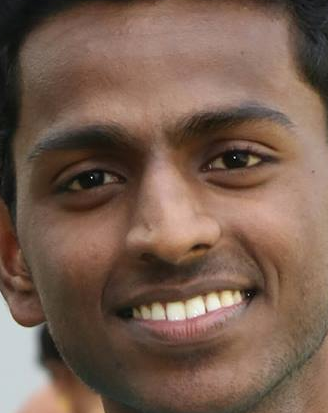

In [65]:
# One way to array to image!
cropped_face = Image.fromarray(face)
cropped_face 

In [52]:
face_array = np.array(face)
face_array.ravel()

array([ 24,  25,  27, ..., 162, 125,  99], dtype=uint8)

In [53]:
# Second is simple plt.imshow! but not shape or reshap !
# cropped_face = plt.imshow(face)
# cropped_face.shape

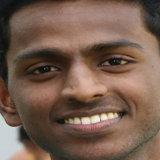

In [54]:
cropped_face_resize = cropped_face.resize((160,160))
cropped_face_resize

### Fucntion to Detect faces

In [55]:
def detect_face(filename,size=((160,160))):
    image = cv2.imread(filename)
#     cv2.imshow('Display',image)
#     cv2.waitKey(0)
#     cv2.destroyAllWindows()
    image = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
    image_arr = np.array(image)
    box_res = mtcnn.detect_faces(image_arr)
    x, y, width, height = box_res[0]['box']
    x1, y1, x2, y2 = abs(x), abs(y), x + width, y + height
    face = image_arr[y1:y2, x1:x2]
    cropped_face = Image.fromarray(face)
    cropped_face_resize = cropped_face.resize(size)
    face_array = np.array(cropped_face_resize)
    return face_array

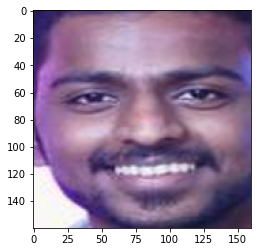

In [56]:
face = detect_face('images/Santosh/santosh image.JPG')
plt.imshow(face)

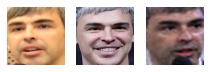

In [57]:
from os import listdir
folder = 'images/LarryPage/'
i = 1
for filename in listdir(folder):
    path = folder + filename
    face = detect_face(path)
    pyplot.subplot(1,5,i)
    pyplot.axis('off')
    pyplot.imshow(face)
    i += 1
pyplot.show()

# Face Classification!